In [1]:
import tensorflow as tf
from tensorflow. keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 1212 files belonging to 6 classes.


In [4]:
class_names = dataset.class_names
class_names

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [5]:
len(dataset)

38

In [6]:
38*32

1216

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[3 3 0 1 5 0 3 4 3 5 4 5 5 0 1 3 1 1 1 4 0 1 5 2 2 2 4 1 1 3 0 5]


In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(labels_batch.numpy())

[[[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 [[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 [[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [251.95312 250.97656 251.95312]
  [251.95312 250.97656 251.95312]
  [251.95312 250.97656 251.95312]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [252.      251.      252.     ]
  [2

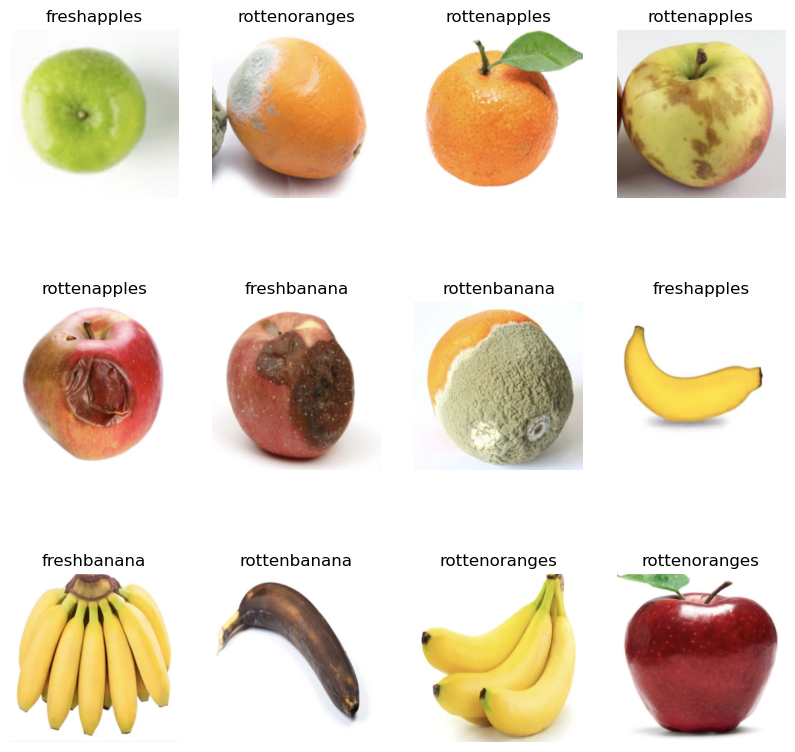

In [9]:
plt.figure(figsize=(10,10))
for iamage_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
def get_dataset(ds, train_split=0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+test_split+val_split)==1
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
     
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [12]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
len(train_ds)

30

In [14]:
len(val_ds)

3

In [15]:
len(test_ds)

5

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x, training=True),y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [22]:
model.compile(
	optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs = 20,

)

Epoch 1/20
30/30 [==============================] - 197s 6s/step - loss: 1.7326 - accuracy: 0.2427 - val_loss: 1.5186 - val_accuracy: 0.3958
Epoch 2/20
30/30 [==============================] - 132s 4s/step - loss: 1.3405 - accuracy: 0.4582 - val_loss: 1.0885 - val_accuracy: 0.4792
Epoch 3/20
30/30 [==============================] - 154s 5s/step - loss: 0.9539 - accuracy: 0.6506 - val_loss: 0.7196 - val_accuracy: 0.7292
Epoch 4/20
30/30 [==============================] - 188s 6s/step - loss: 0.7742 - accuracy: 0.7071 - val_loss: 0.6786 - val_accuracy: 0.7604
Epoch 5/20
30/30 [==============================] - 213s 7s/step - loss: 0.7581 - accuracy: 0.7165 - val_loss: 0.6388 - val_accuracy: 0.7917
Epoch 6/20
30/30 [==============================] - 217s 7s/step - loss: 0.7064 - accuracy: 0.7416 - val_loss: 0.5200 - val_accuracy: 0.8125
Epoch 7/20
30/30 [==============================] - 183s 6s/step - loss: 0.5509 - accuracy: 0.8075 - val_loss: 0.3450 - val_accuracy: 0.8854
Epoch 8/20
30

In [24]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 6s 556ms/step - loss: 0.3844 - accuracy: 0.8875


In [25]:
scores

[0.3843592703342438, 0.887499988079071]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 30}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
type(history.history['loss'])

list

In [30]:
len(history.history['loss'])

20

In [31]:
history.history['loss'][:5]

[1.7326383590698242,
 1.340506911277771,
 0.9539459943771362,
 0.7742429375648499,
 0.7580756545066833]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

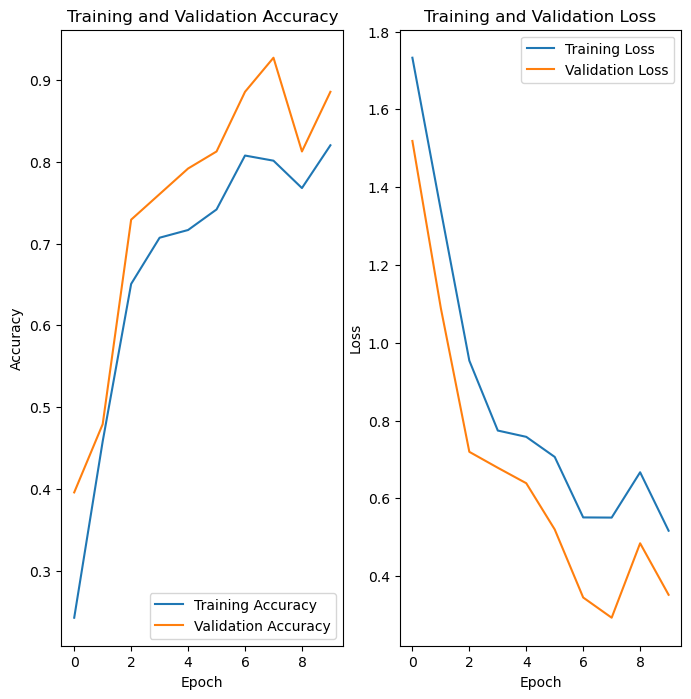

In [33]:
import matplotlib.pyplot as plt
EPOCHS = 10
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc[:EPOCHS], label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc[:EPOCHS], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss[:EPOCHS], label='Training Loss')
plt.plot(range(EPOCHS), val_loss[:EPOCHS], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


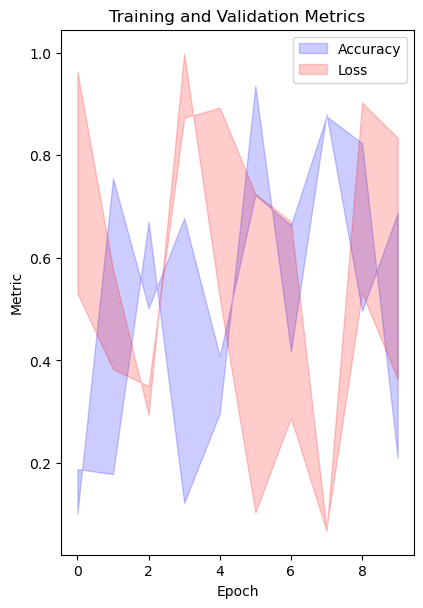

In [9]:
import matplotlib.pyplot as plt
import numpy as np

EPOCHS = 10
acc = np.random.rand(EPOCHS)
val_acc = np.random.rand(EPOCHS)
loss = np.random.rand(EPOCHS)
val_loss = np.random.rand(EPOCHS)

plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 3)
plt.fill_between(range(EPOCHS), acc[:EPOCHS], val_acc[:EPOCHS], alpha=0.2, color='blue', label='Accuracy')
plt.fill_between(range(EPOCHS), loss[:EPOCHS], val_loss[:EPOCHS], alpha=0.2, color='red', label='Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric')

plt.show()


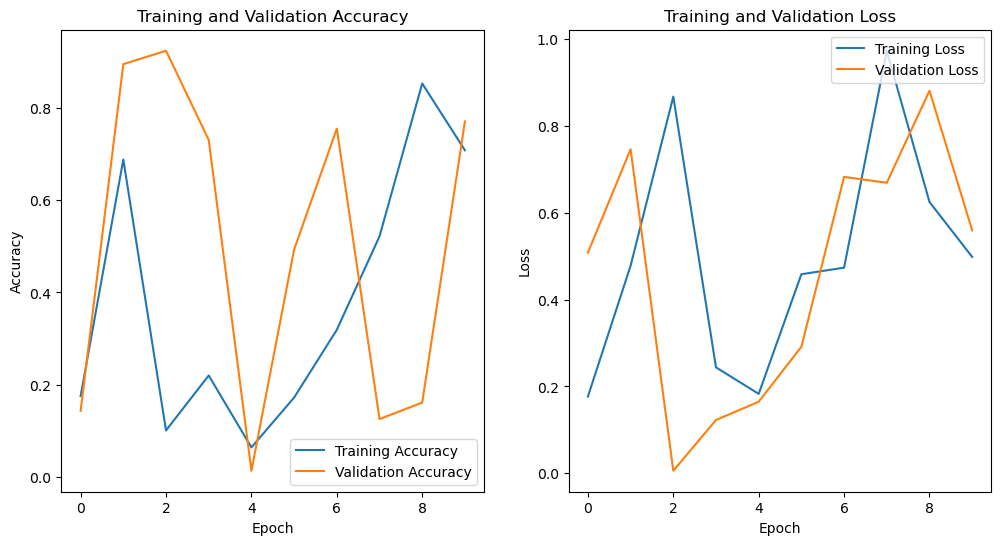

In [7]:
import matplotlib.pyplot as plt
import numpy as np

EPOCHS = 10
acc = np.random.rand(EPOCHS)
val_acc = np.random.rand(EPOCHS)
loss = np.random.rand(EPOCHS)
val_loss = np.random.rand(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc[:EPOCHS], label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc[:EPOCHS], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss[:EPOCHS], label='Training Loss')
plt.plot(range(EPOCHS), val_loss[:EPOCHS], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


Text(0, 0.5, 'Loss')

<Figure size 1500x2500 with 0 Axes>

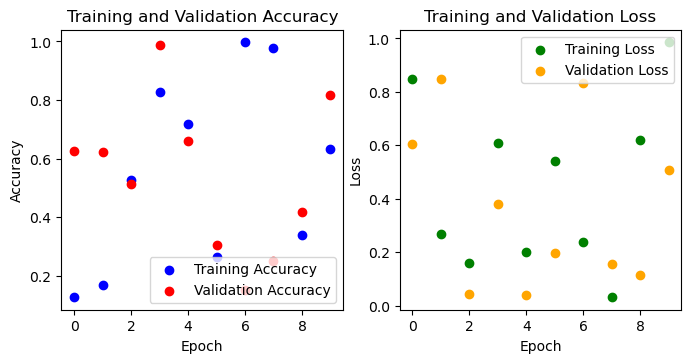

In [17]:
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 10
acc = np.random.rand(EPOCHS)
val_acc = np.random.rand(EPOCHS)
loss = np.random.rand(EPOCHS)
val_loss = np.random.rand(EPOCHS)
plt.figure(figsize=(15, 25))
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.scatter(range(EPOCHS), acc[:EPOCHS], label='Training Accuracy', color='blue')
plt.scatter(range(EPOCHS), val_acc[:EPOCHS], label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(2, 2, 2)
plt.scatter(range(EPOCHS), loss[:EPOCHS], label='Training Loss', color='green')
plt.scatter(range(EPOCHS), val_loss[:EPOCHS], label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Metric')

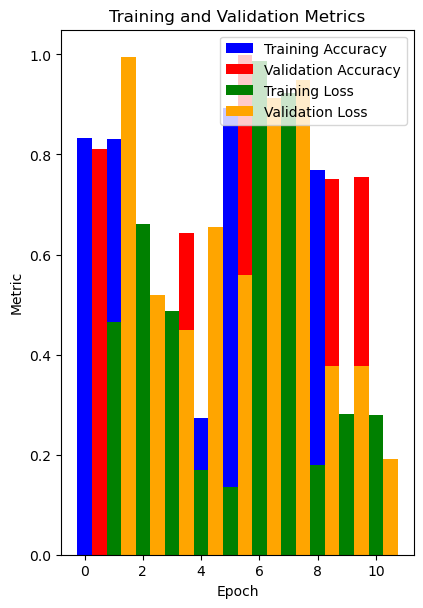

In [14]:
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 10
acc = np.random.rand(EPOCHS)
val_acc = np.random.rand(EPOCHS)
loss = np.random.rand(EPOCHS)
val_loss = np.random.rand(EPOCHS)
plt.figure(figsize=(10, 15))
plt.subplot(2, 2, 4)
bar_width = 0.50
plt.bar(np.arange(EPOCHS), acc[:EPOCHS], bar_width, label='Training Accuracy', color='blue')
plt.bar(np.arange(EPOCHS) + bar_width, val_acc[:EPOCHS], bar_width, label='Validation Accuracy', color='red')
plt.bar(np.arange(EPOCHS) + 2*bar_width, loss[:EPOCHS], bar_width, label='Training Loss', color='green')
plt.bar(np.arange(EPOCHS) + 3*bar_width, val_loss[:EPOCHS], bar_width, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric')


Text(0.5, 1.0, 'Accuracy')

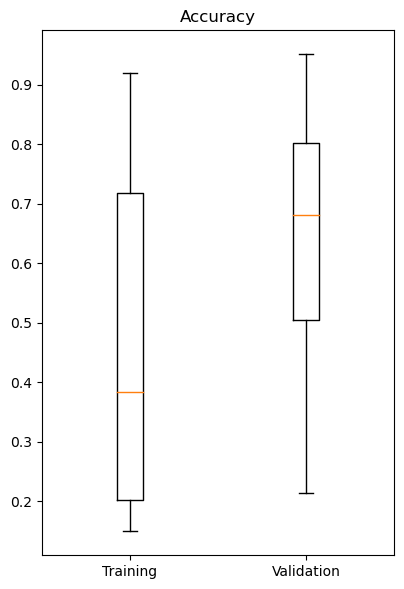

In [16]:
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 10
acc = np.random.rand(EPOCHS)
val_acc = np.random.rand(EPOCHS)
loss = np.random.rand(EPOCHS)
val_loss = np.random.rand(EPOCHS)
plt.figure(figsize=(10, 15))
plt.subplot(2, 2, 3)
plt.boxplot([acc, val_acc])
plt.xticks([1, 2], ['Training', 'Validation'])
plt.title('Accuracy')


First image to predict


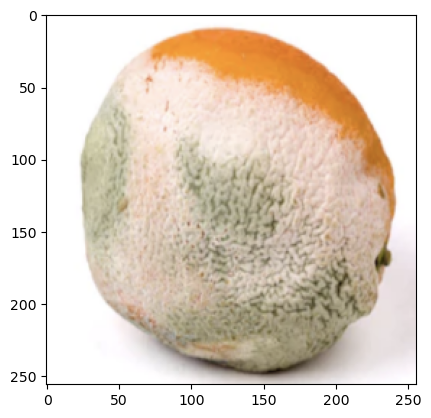

Actual label: rottenoranges
1/1 [==============================] - 0s 87ms/step
Predicted label: rottenoranges
Second image to predict


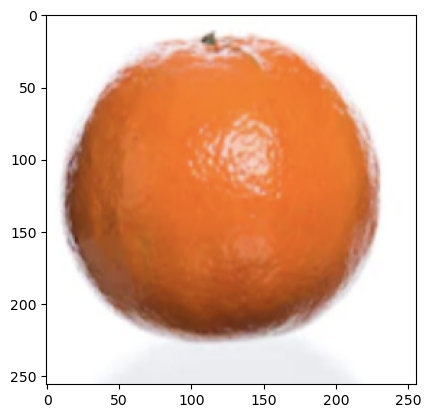

Actual label: freshoranges
1/1 [==============================] - 0s 80ms/step
Predicted label: freshoranges
Third image to predict


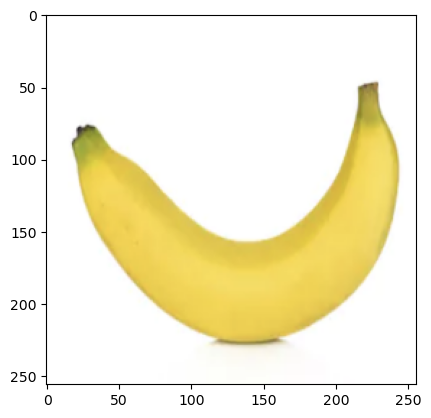

Actual label: freshbanana
1/1 [==============================] - 0s 80ms/step
Predicted label: freshbanana


In [52]:
import numpy as np

for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    second_image = image_batch[1].numpy().astype('uint8')
    second_label = labels_batch[1].numpy()
    
    third_image = image_batch[2].numpy().astype('uint8')
    third_label = labels_batch[2].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])
    batch_prediction = model.predict(np.expand_dims(first_image, axis=0))
    print("Predicted label:", class_names[np.argmax(batch_prediction)])
    print("Second image to predict")
    plt.imshow(second_image)
    plt.show()
    print("Actual label:", class_names[second_label])
    batch_prediction = model.predict(np.expand_dims(second_image, axis=0))
    print("Predicted label:", class_names[np.argmax(batch_prediction)])
    print("Third image to predict")
    plt.imshow(third_image)
    plt.show()
    print("Actual label:", class_names[third_label])
    batch_prediction = model.predict(np.expand_dims(third_image, axis=0))
    print("Predicted label:", class_names[np.argmax(batch_prediction)])


In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 79ms/step


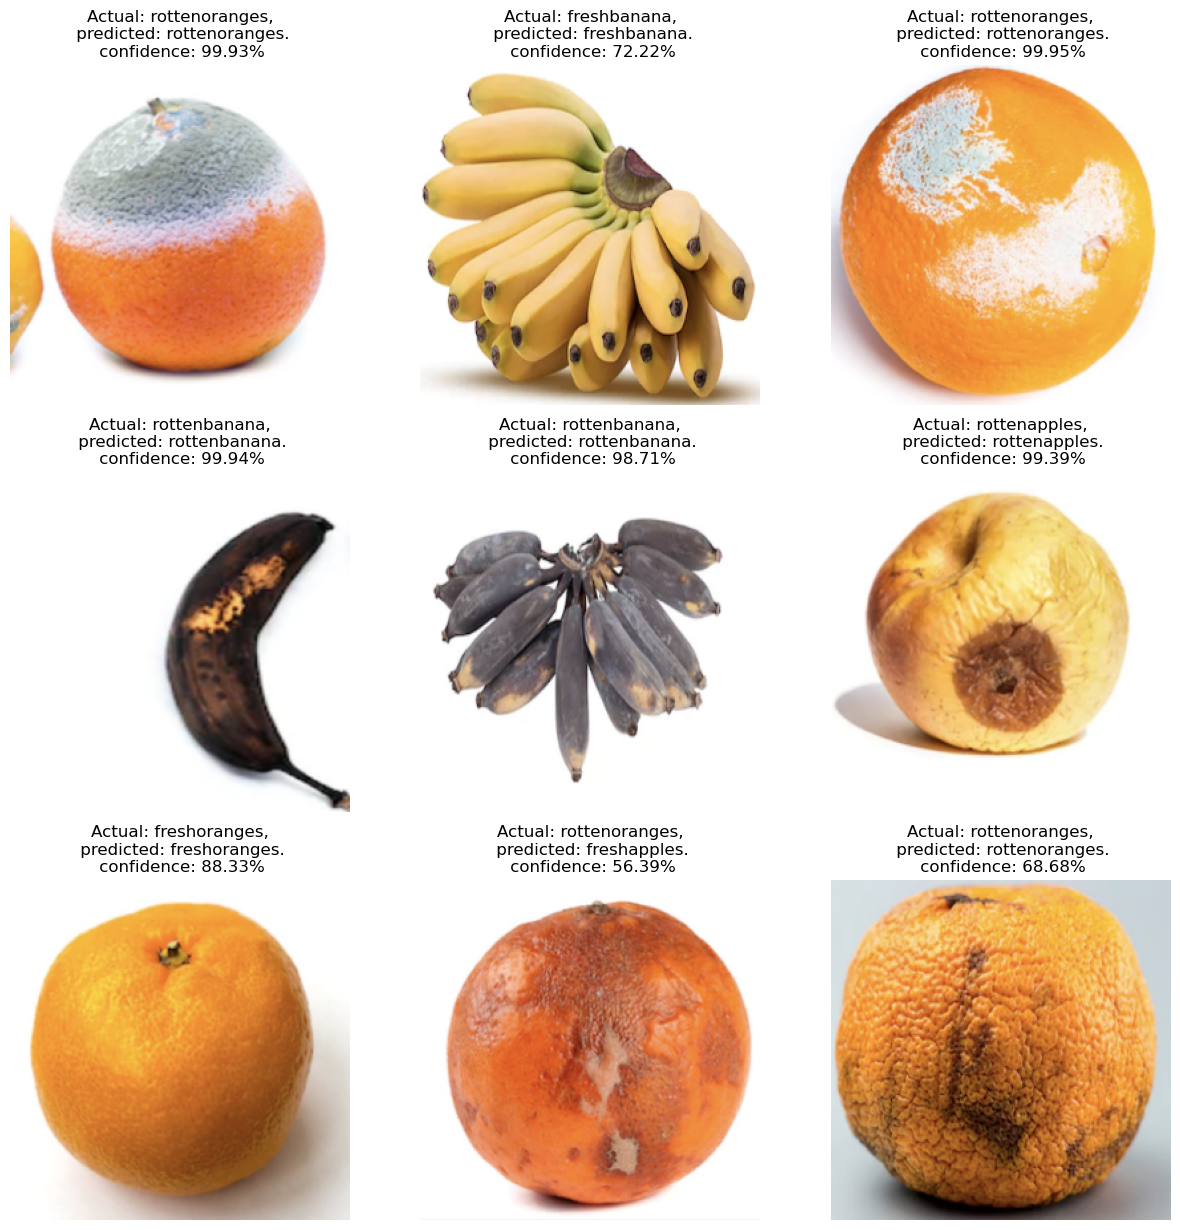

In [40]:
plt.figure(figsize=(15,15))
for image ,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class, confidence= predict(model, image[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n predicted: {predicted_class}.\n confidence: {confidence}%")
        plt.axis("off")

In [37]:
import os

model_files = [f for f in os.listdir("models") if f.isdigit()]
model_version = max([int(f) for f in model_files] + [0])
model_path = f"models/{model_version}"


In [38]:
model.save("models/fruit.h5")

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
from flask import Flask, request, render_template
import os

APP_ROOT = os.path.dirname(os.path.abspath('fruitenv'))
model = load_model("models/fruit.h5")
class_names = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/about')
def about():
    return render_template('about.html')

@app.route('/contact')
def contact():
    return render_template('contact.html')

@app.route('/predic tion', methods=['GET', 'POST'])
def prediction():
    predicted_class = None
    confidence = None

    if request.method == 'POST':
        f = request.files['fruit']
        filename = f.filename
        target = os.path.join(APP_ROOT, 'images/')
        print(target)
        des = os.path.join(target, filename)
        f.save(des)

        test_image = image.load_img(os.path.join(target, filename), target_size=(300, 300))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        prediction = model.predict(test_image)
        print(prediction)

        predicted_class = class_names[np.argmax(prediction[0])]
        confidence = np.max(prediction[0])
        print(confidence)

    return render_template('prediction.html', confidence=confidence, predicted_class=predicted_class)

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Apr/2023 13:47:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2023 13:47:10] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Apr/2023 13:49:13] "GET /prediction HTTP/1.1" 404 -
